In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rankings = pd.read_csv('2023_rankings.csv')
rankings.head(10)

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,...,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited
0,10,1,University of Oxford,96.4,10,92.3,5,99.7,1,99.0,...,28,United Kingdom,"20,965",10.6,42%,48 : 52,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False
1,20,2,Harvard University,95.2,20,94.8,1,99.0,3,99.3,...,214,United States,"21,887",9.6,25%,50 : 50,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False
2,30,=3,University of Cambridge,94.8,30,90.9,7,99.5,2,97.0,...,34,United Kingdom,"20,185",11.3,39%,47 : 53,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False
3,40,=3,Stanford University,94.8,40,94.2,2,96.7,7,99.8,...,223,United States,"16,164",7.1,24%,46 : 54,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False
4,50,5,Massachusetts Institute of Technology,94.2,50,90.7,8,93.6,11,99.8,...,119,United States,"11,415",8.2,33%,40 : 60,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False
5,60,6,California Institute of Technology,94.1,60,90.9,6,97.0,5,97.3,...,176,United States,"2,237",6.2,34%,37 : 63,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False
6,70,7,Princeton University,92.4,70,87.6,12,95.9,8,99.1,...,215,United States,"8,279",8.0,23%,46 : 54,Princeton University,"Languages, Literature & Linguistics,Biological...",False,False
7,80,8,"University of California, Berkeley",92.1,80,86.4,14,95.8,9,99.0,...,238,United States,"40,921",18.4,24%,52 : 48,"University of California, Berkeley","Communication & Media Studies,Education,Civil ...",False,False
8,90,9,Yale University,91.4,90,92.6,3,92.7,14,97.0,...,335,United States,"13,482",5.9,21%,52 : 48,Yale University,"Economics & Econometrics,Medicine & Dentistry,...",False,False
9,100,10,Imperial College London,90.4,100,82.8,16,90.8,17,98.3,...,17,United Kingdom,"18,545",11.2,61%,40 : 60,Imperial College London,"Mechanical & Aerospace Engineering,General Eng...",False,False


In [3]:
# Table indexes
rankings.columns

Index(['rank_order', 'rank', 'name', 'scores_overall', 'scores_overall_rank',
       'scores_teaching', 'scores_teaching_rank', 'scores_research',
       'scores_research_rank', 'scores_citations', 'scores_citations_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'location', 'stats_number_students', 'stats_student_staff_ratio',
       'stats_pc_intl_students', 'stats_female_male_ratio', 'aliases',
       'subjects_offered', 'closed', 'unaccredited'],
      dtype='object')

In [4]:
# Dimensionality of the DataFrame
rankings.shape

(2345, 24)

In [5]:
# Information about table
rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         2345 non-null   int64  
 1   rank                               2345 non-null   object 
 2   name                               2345 non-null   object 
 3   scores_overall                     1799 non-null   object 
 4   scores_overall_rank                2345 non-null   int64  
 5   scores_teaching                    1799 non-null   float64
 6   scores_teaching_rank               2345 non-null   int64  
 7   scores_research                    1799 non-null   float64
 8   scores_research_rank               2345 non-null   int64  
 9   scores_citations                   1799 non-null   float64
 10  scores_citations_rank              2345 non-null   int64  
 11  scores_industry_income             1799 non-null   float

In [6]:
# Data cleaning by dropping unnecessary columns
rankings.drop(['rank_order', 'scores_overall_rank', 'scores_teaching_rank', 'scores_research_rank', 'scores_citations_rank', 'scores_industry_income_rank', 'scores_international_outlook', 'stats_student_staff_ratio','stats_female_male_ratio', 'closed', 'unaccredited' ], axis = 1,  inplace = True)
rankings

,rank,name,scores_overall,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook_rank,location,stats_number_students,stats_pc_intl_students,aliases,subjects_offered
0,1,University of Oxford,96.4,92.3,99.7,99.0,74.9,28,United Kingdom,"20,965",42%,University of Oxford,"Accounting & Finance,General Engineering,Commu..."
1,2,Harvard University,95.2,94.8,99.0,99.3,49.5,214,United States,"21,887",25%,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan..."
2,=3,University of Cambridge,94.8,90.9,99.5,97.0,54.2,34,United Kingdom,"20,185",39%,University of Cambridge,"Business & Management,General Engineering,Art,..."
3,=3,Stanford University,94.8,94.2,96.7,99.8,65.0,223,United States,"16,164",24%,Stanford University,"Physics & Astronomy,Computer Science,Politics ..."
4,5,Massachusetts Institute of Technology,94.2,90.7,93.6,99.8,90.9,119,United States,"11,415",33%,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2340,Reporter,York St John University,NaN,NaN,NaN,NaN,NaN,0,United Kingdom,"6,315",12%,York St John University,"Biological Sciences,General Engineering,Geogra..."
2341,Reporter,"Yusuf Maitama Sule University, Kano",NaN,NaN,NaN,NaN,NaN,0,Nigeria,"12,880",0%,"Yusuf Maitama Sule University, Kano","Computer Science,Education,Politics & Internat..."
2342,Reporter,Zhytomyr Polytechnic State University,NaN,NaN,NaN,NaN,NaN,0,Ukraine,"3,869",1%,Zhytomyr Polytechnic State University,"Economics & Econometrics,Computer Science,Acco..."
2343,Reporter,Ziauddin University,NaN,NaN,NaN,NaN,NaN,0,Pakistan,"4,906",1%,Ziauddin University,"Business & Management,Biological Sciences,Medi..."


In [7]:
# Finding null values 
rankings.isnull()

,rank,name,scores_overall,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook_rank,location,stats_number_students,stats_pc_intl_students,aliases,subjects_offered
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2340,False,False,True,True,True,True,True,False,False,False,False,False,False
2341,False,False,True,True,True,True,True,False,False,False,False,False,False
2342,False,False,True,True,True,True,True,False,False,False,False,False,False
2343,False,False,True,True,True,True,True,False,False,False,False,False,False


In [8]:
# Finding Null values
rankings.isnull().sum()

rank                                   0
name                                   0
scores_overall                       546
scores_teaching                      546
scores_research                      546
scores_citations                     546
scores_industry_income               546
scores_international_outlook_rank      0
location                               0
stats_number_students                  0
stats_pc_intl_students                 0
aliases                                0
subjects_offered                       6
dtype: int64

In [9]:
# Replacing null values using NumPy
rankings.fillna({'scores_overall': 0, 'scores_teaching': 0, 'scores_research': 0, 'scores_citations': 0, 'scores_industry_income': 0, 'subjects_offered': 0}, inplace=True)

In [10]:
rankings.isnull().sum()

rank                                 0
name                                 0
scores_overall                       0
scores_teaching                      0
scores_research                      0
scores_citations                     0
scores_industry_income               0
scores_international_outlook_rank    0
location                             0
stats_number_students                0
stats_pc_intl_students               0
aliases                              0
subjects_offered                     0
dtype: int64

In [11]:
# Finding duplicate values
rankings.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2340    False
2341    False
2342    False
2343    False
2344    False
Length: 2345, dtype: bool

In [12]:
# Searching for a Lithuanian universities
rankings[rankings['location'].isin (['Lithuania']) ] 

,rank,name,scores_overall,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook_rank,location,stats_number_students,stats_pc_intl_students,aliases,subjects_offered
892,801–1000,Lithuanian University of Health Sciences,29.8–33.9,21.0,10.6,60.7,37.4,502,Lithuania,"6,167",22%,Lithuanian University of Health Sciences,"Veterinary Science,Medicine & Dentistry,Agricu..."
988,801–1000,Vilnius University,29.8–33.9,21.4,18.7,47.3,45.9,566,Lithuania,"17,012",9%,Vilnius University,"Sociology,Education,Psychology,Chemistry,Elect..."
1325,1201–1500,Kaunas University of Technology,18.4–24.3,18.2,15.9,21.3,43.8,824,Lithuania,"8,361",8%,Kaunas University of Technology,"Economics & Econometrics,General Engineering,S..."
1484,1201–1500,Vilnius Gediminas Technical University (Vilniu...,18.4–24.3,18.0,14.7,32.1,43.2,727,Lithuania,"8,322",11%,Vilnius Gediminas Technical University (Vilniu...,"General Engineering,Art, Performing Arts & Des..."
1489,1201–1500,Vytautas Magnus University,18.4–24.3,18.3,12.4,15.5,37.0,375,Lithuania,"7,765",14%,Vytautas Magnus University,"Economics & Econometrics,Languages, Literature..."


In [13]:
# How many universities Lithuania have in rankings?
lithaunia_len = len(rankings[(rankings['location']=='Lithuania')])
print(lithaunia_len)

5


In [14]:
# Best Lithuanian university by scores research
rankings[rankings['location'].isin (['Lithuania'])].sort_values(by = 'scores_research',ascending = False).head(1)

,rank,name,scores_overall,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook_rank,location,stats_number_students,stats_pc_intl_students,aliases,subjects_offered
988,801–1000,Vilnius University,29.8–33.9,21.4,18.7,47.3,45.9,566,Lithuania,"17,012",9%,Vilnius University,"Sociology,Education,Psychology,Chemistry,Elect..."


In [15]:
# Last Lithuanian university by scores research
rankings[rankings['location'].isin (['Lithuania'])].sort_values(by = 'scores_research').head(1)

,rank,name,scores_overall,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook_rank,location,stats_number_students,stats_pc_intl_students,aliases,subjects_offered
892,801–1000,Lithuanian University of Health Sciences,29.8–33.9,21.0,10.6,60.7,37.4,502,Lithuania,"6,167",22%,Lithuanian University of Health Sciences,"Veterinary Science,Medicine & Dentistry,Agricu..."


In [16]:
# TOP-100 universities
rankings1  = rankings.iloc[:100]
rankings1

,rank,name,scores_overall,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook_rank,location,stats_number_students,stats_pc_intl_students,aliases,subjects_offered
0,1,University of Oxford,96.4,92.3,99.7,99.0,74.9,28,United Kingdom,"20,965",42%,University of Oxford,"Accounting & Finance,General Engineering,Commu..."
1,2,Harvard University,95.2,94.8,99.0,99.3,49.5,214,United States,"21,887",25%,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan..."
2,=3,University of Cambridge,94.8,90.9,99.5,97.0,54.2,34,United Kingdom,"20,185",39%,University of Cambridge,"Business & Management,General Engineering,Art,..."
3,=3,Stanford University,94.8,94.2,96.7,99.8,65.0,223,United States,"16,164",24%,Stanford University,"Physics & Astronomy,Computer Science,Politics ..."
4,5,Massachusetts Institute of Technology,94.2,90.7,93.6,99.8,90.9,119,United States,"11,415",33%,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,=95,Institut Polytechnique de Paris,63.6,58.5,58.8,64.8,72.7,38,France,"5,999",41%,Institut Polytechnique de Paris,"Other Health,Biological Sciences,Languages, Li..."
96,=95,Nanjing University,63.6,58.4,58.2,74.3,87.3,568,China,"36,426",8%,Nanjing University,"Other Health,Sociology,Economics & Econometric..."
97,98,Vanderbilt University,63.5,49.5,47.5,96.5,66.7,657,United States,"12,696",15%,Vanderbilt University,"Psychology,Politics & International Studies (i..."
98,=99,City University of Hong Kong,63.4,47.2,53.0,79.9,76.6,2,Hong Kong,"9,099",62%,City University of Hong Kong CityU HK,"Civil Engineering,Chemistry,Architecture,Psych..."


In [17]:
# In which countries is most the universities
rankings1['location'].value_counts()

location
United States     34
United Kingdom    10
Germany            9
China              7
Australia          7
Netherlands        7
Hong Kong          5
Switzerland        4
Canada             4
France             4
South Korea        3
Singapore          2
Japan              2
Belgium            1
Sweden             1
Name: count, dtype: int64

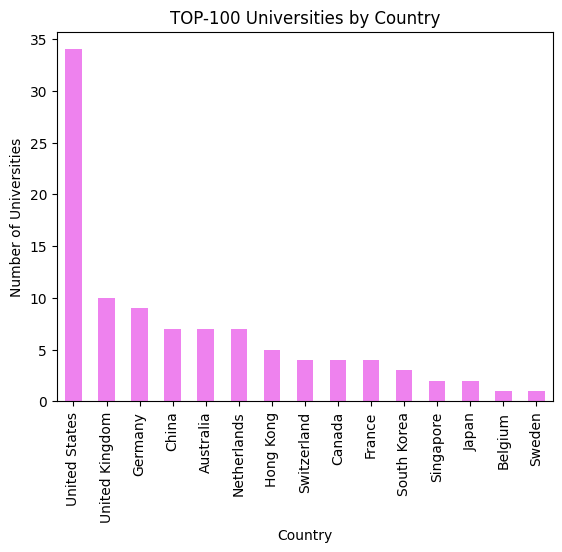

In [18]:
# A bar chart
rankings1['location'].value_counts().plot(kind='bar', color='violet')
plt.title('TOP-100 Universities by Country')
plt.xlabel('Country')
plt.ylabel('Number of Universities')
plt.show()

In [19]:
# Converting 'Scores Overall' column to float
rankings1['scores_overall'] = rankings1['scores_overall'].astype(float)

C:\Users\Gabriele\AppData\Local\Temp\ipykernel_14616\2508012192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rankings1['scores_overall'] = rankings1['scores_overall'].astype(float)


In [20]:
print(rankings1['scores_overall'].dtype)

float64


In [21]:
# How many universities have scores overall more than 90
overall = 0
for num in rankings1.values:
    if num[2] >= 90.0:
        overall += 1
overall

10

In [22]:
# The universities and their countries which have score overall more than 90
universities = rankings1[:10].values
for i in universities:
    print(f'{i[1]}: {i[2]}: {i[8]}')


University of Oxford: 96.4: United Kingdom
Harvard University: 95.2: United States
University of Cambridge: 94.8: United Kingdom
Stanford University: 94.8: United States
Massachusetts Institute of Technology: 94.2: United States
California Institute of Technology: 94.1: United States
Princeton University: 92.4: United States
University of California, Berkeley: 92.1: United States
Yale University: 91.4: United States
Imperial College London: 90.4: United Kingdom


In [23]:
# Sorting the TOP-5 universities by 'Scores teaching'
rankings.sort_values(by = 'scores_teaching',ascending = False).head(5)

,rank,name,scores_overall,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook_rank,location,stats_number_students,stats_pc_intl_students,aliases,subjects_offered
1,2,Harvard University,95.2,94.8,99.0,99.3,49.5,214,United States,"21,887",25%,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan..."
3,=3,Stanford University,94.8,94.2,96.7,99.8,65.0,223,United States,"16,164",24%,Stanford University,"Physics & Astronomy,Computer Science,Politics ..."
8,9,Yale University,91.4,92.6,92.7,97.0,55.0,335,United States,"13,482",21%,Yale University,"Economics & Econometrics,Medicine & Dentistry,..."
16,17,Peking University,88.1,92.5,96.7,80.4,91.8,409,China,"31,994",19%,Peking University,"Other Health,Physics & Astronomy,Business & Ma..."
0,1,University of Oxford,96.4,92.3,99.7,99.0,74.9,28,United Kingdom,"20,965",42%,University of Oxford,"Accounting & Finance,General Engineering,Commu..."


In [24]:
# Average number of students in the TOP-20
rankings['stats_number_students'] = rankings['stats_number_students'].str.replace(",","").replace(" ","")
rankings['stats_number_students']= rankings['stats_number_students'].astype(int)
top20 = rankings.iloc[:20]
avg_stud = top20['stats_number_students'].mean()
avg_stud

23803.95

In [25]:
# Maximum number of students in the TOP-20
top20[['stats_number_students']].max()

stats_number_students    77468
dtype: int32

In [26]:
# Minimum number of students in the TOP-20
top20[['stats_number_students']].min()

stats_number_students    2237
dtype: int32

In [27]:
# Which university has the most international students?
print(rankings[['stats_pc_intl_students', 'name', 'location']].max())

stats_pc_intl_students                       99%
name                      ​Wellspring University
location                                Zimbabwe
dtype: object
